In [21]:
# %% [1] Gerekli Kütüphanelerin Yüklenmesi
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [22]:
# Projeye özel local script import:
sys.path.append(os.path.abspath("../source"))

In [24]:
#local script import
from source.utils.config_loader import load_config
from source.utils.logger import setup_logger
from source.data_preprocessing import (
    load_data,
    fill_missing_values,
    scale_features,
    visualize_missing_values,
    correlation_analysis,
    detect_outliers,
    basic_info,
)


In [25]:
#dizinlerin tanımlanması
RAW_DIR = "../data/raw"
PROCESSED_DIR = "../data/processed"
PLOTS_DIR = "../plots/"
LOG_DIR = "../logs/"

In [26]:
# Logger oluştur
logger = setup_logger(name="data_preprocessing", log_file=os.path.join(LOG_DIR, "data_preprocessing.log"), log_level="INFO")

In [27]:
# Config dosyasını yükle
CONFIG_PATH = "../config/settings.yml"
config = load_config(CONFIG_PATH)

# Dizinleri config'den al
RAW_DIR = config["paths"]["raw_dir"]
PROCESSED_DIR = config["paths"]["processed_dir"]
PLOTS_DIR = config["paths"].get("plots_dir", "../plots")


In [28]:
# Plot dizinini oluştur
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(LOG_DIR, exist_ok=True)
logger.info("Notebook initialized.")

2024-12-31 19:48:24,832 - data_preprocessing - INFO - Notebook initialized.


In [29]:
# %% [2] Veri Yükleme
file_path = os.path.join(PROCESSED_DIR, "epa_long_preprocessed.csv")

try:
    df = load_data(file_path)
    logger.info("Data successfully loaded.")
except Exception as e:
    logger.error(f"Error loading data: {e}")
    raise

# Veri seti temel bilgileri
info = basic_info(df)
print(info)


2024-12-31 19:48:26,889 - data_preprocessing - INFO - Loading data from ../source/data/processed/epa_long_preprocessed.csv
2024-12-31 19:48:26,891 - data_preprocessing - ERROR - Error loading data: [Errno 2] No such file or directory: '../source/data/processed/epa_long_preprocessed.csv'
2024-12-31 19:48:26,892 - data_preprocessing - ERROR - Error loading data: [Errno 2] No such file or directory: '../source/data/processed/epa_long_preprocessed.csv'


FileNotFoundError: [Errno 2] No such file or directory: '../source/data/processed/epa_long_preprocessed.csv'

2024-12-31 18:16:48,944 - notebook_data_preprocessing - INFO - Visualizing missing values.
2024-12-31 18:16:48,945 - data_preprocessing - INFO - Visualizing missing values.
2024-12-31 18:16:50,129 - data_preprocessing - ERROR - Error in missing values visualization: name 'PLOTS_DIR' is not defined


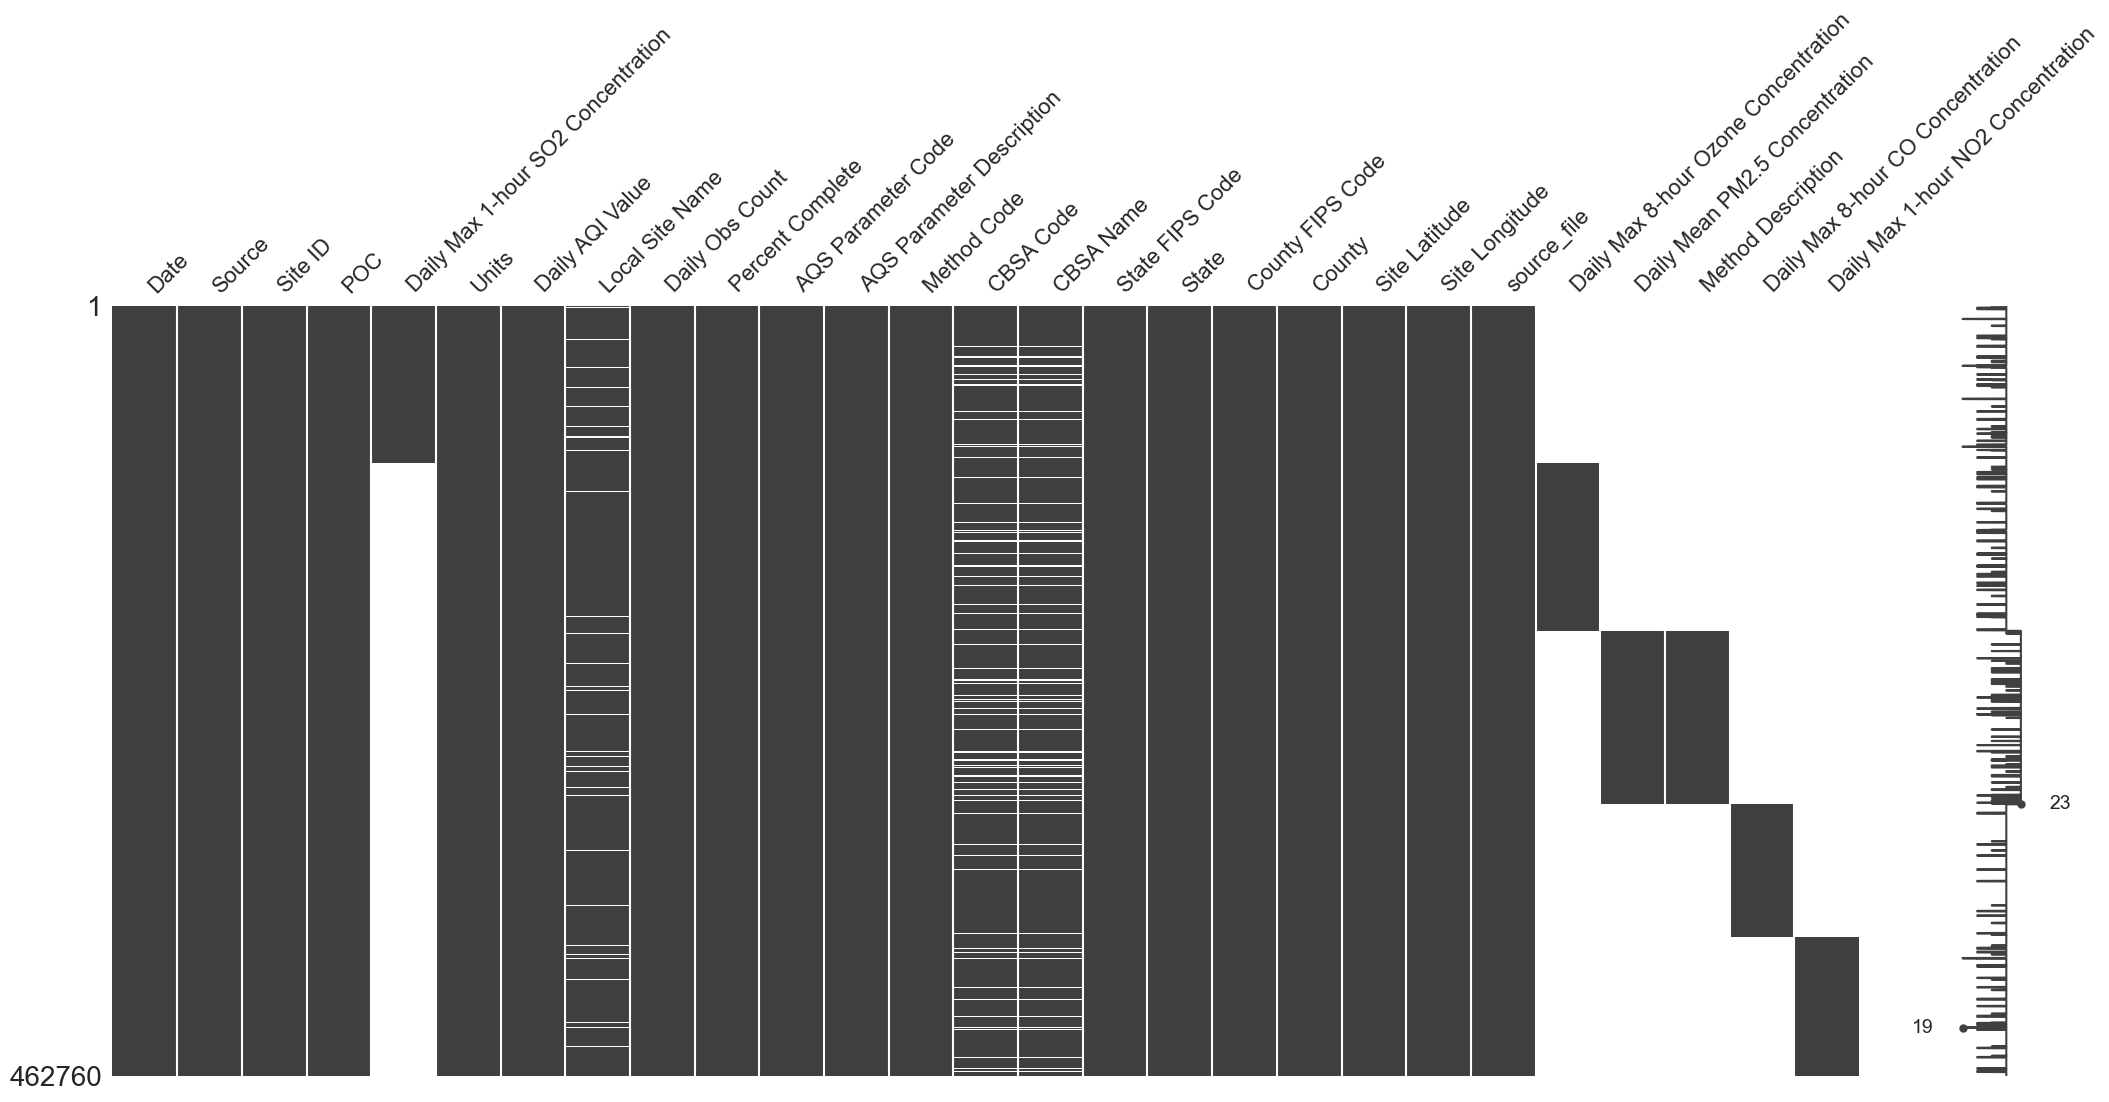

In [32]:
# %% [3] Eksik Değerlerin Görselleştirilmesi
logger.info("Visualizing missing values.")
visualize_missing_values(df)


In [33]:
# %% [4] Eksik Değerlerin Doldurulması
logger.info("Filling missing values using mean method.")
df = fill_missing_values(df, method="mean")

# Eksik değerlerin doldurulmasından sonra temel bilgi
info_after_filling = basic_info(df)
print(info_after_filling)


2024-12-31 18:16:53,457 - notebook_data_preprocessing - INFO - Filling missing values using mean method.
2024-12-31 18:16:53,458 - data_preprocessing - INFO - Filling missing values using method: mean
/Users/dogaaydin/PycharmProjects/Geo_Sentiment_Climate/source/data_preprocessing.py:82: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.show()
2024-12-31 18:23:08,736 - data_preprocessing - INFO - Missing values filled successfully.
2024-12-31 18:23:08,748 - data_preprocessing - INFO - Generating basic info of the dataset
2024-12-31 18:23:09,048 - data_preprocessing - INFO - Dataset Info: {'Shape': (462760, 27), 'Columns': ['Date', 'Source', 'Site ID', 'POC', 'Daily Max 1-hour SO2 Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count

{'Shape': (462760, 27), 'Columns': ['Date', 'Source', 'Site ID', 'POC', 'Daily Max 1-hour SO2 Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude', 'source_file', 'Daily Max 8-hour Ozone Concentration', 'Daily Mean PM2.5 Concentration', 'Method Description', 'Daily Max 8-hour CO Concentration', 'Daily Max 1-hour NO2 Concentration'], 'Data Types': {'Date': dtype('O'), 'Source': dtype('O'), 'Site ID': dtype('int64'), 'POC': dtype('int64'), 'Daily Max 1-hour SO2 Concentration': dtype('float64'), 'Units': dtype('O'), 'Daily AQI Value': dtype('int64'), 'Local Site Name': dtype('O'), 'Daily Obs Count': dtype('int64'), 'Percent Complete': dtype('float64'), 'AQS Parameter Code': dtype('int64'), 'AQS Parameter Description': dtype('O'), 'Method Code': dtype('float64'

In [34]:
# %% [5] Sayısal Verilerin Ölçeklendirilmesi
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

logger.info("Scaling numeric columns using standard method.")
df = scale_features(df, numeric_cols, method="standard")


2024-12-31 18:31:42,077 - notebook_data_preprocessing - INFO - Scaling numeric columns using standard method.
2024-12-31 18:31:42,078 - data_preprocessing - INFO - Scaling features: ['Site ID', 'POC', 'Daily Max 1-hour SO2 Concentration', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'Method Code', 'CBSA Code', 'State FIPS Code', 'County FIPS Code', 'Site Latitude', 'Site Longitude', 'Daily Max 8-hour Ozone Concentration', 'Daily Mean PM2.5 Concentration', 'Daily Max 8-hour CO Concentration', 'Daily Max 1-hour NO2 Concentration'] using method: standard
2024-12-31 18:31:42,165 - data_preprocessing - INFO - Features scaled successfully.


2024-12-31 18:31:45,324 - notebook_data_preprocessing - INFO - Performing correlation analysis.
2024-12-31 18:31:45,326 - data_preprocessing - INFO - Performing correlation analysis.
2024-12-31 18:31:45,737 - data_preprocessing - ERROR - Error in correlation analysis: name 'PLOTS_DIR' is not defined


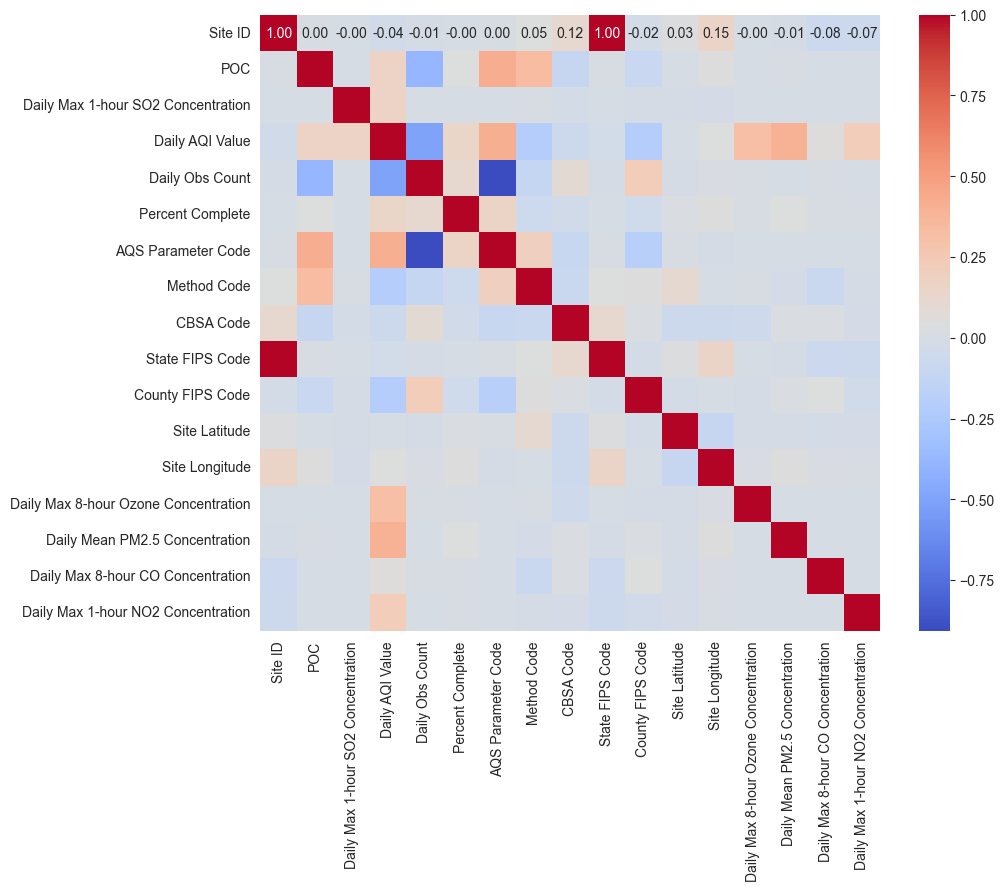

In [35]:
# %% [6] Korelasyon Analizi ve Görselleştirme
logger.info("Performing correlation analysis.")
correlation_analysis(df, numeric_cols)


2024-12-31 18:31:56,061 - notebook_data_preprocessing - INFO - Detecting outliers in numeric columns.
2024-12-31 18:31:56,063 - data_preprocessing - INFO - Detecting outliers in numeric columns.
2024-12-31 18:31:56,089 - data_preprocessing - ERROR - Error in outlier detection: name 'PLOTS_DIR' is not defined


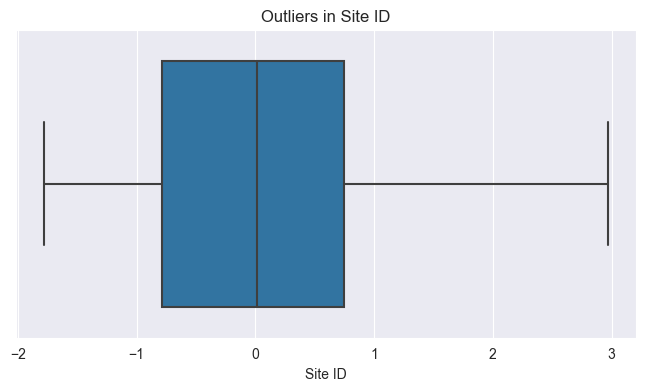

In [36]:
# %% [7] Aykırı Değer Tespiti
logger.info("Detecting outliers in numeric columns.")
detect_outliers(df, numeric_cols)


In [37]:
# %% [8] İşlenmiş Veriyi Kaydetme
output_file = os.path.join(PROCESSED_DIR, "epa_preprocessed.csv")

try:
    df.to_csv(output_file, index=False)
    logger.info(f"Preprocessed data saved successfully at: {output_file}")
except Exception as e:
    logger.error(f"Error saving preprocessed data: {e}")
    raise


2024-12-31 18:32:08,935 - notebook_data_preprocessing - INFO - Preprocessed data saved successfully at: ../data/processed/epa_preprocessed.csv
